Accounting for cross terms in the expansions, there is a condition on approximation to order $K$ s.t.

\begin{equation}\label{Keq}
	K >= 2(A+B)+(C+D+E)
\end{equation} 

where the factor of $2$ accounts for quadratic-order shift terms. By creating an index $F$ which sums to $K$ (i.e., $F'=K$), all other index bounds can be defined, each one constrained by the "current index" of the previous summation to give progressively truncated summations, $E$ serves as a "catch-all" and is not summed:

\begin{equation}
	A' \equiv \lfloor F/2 \rfloor
\end{equation}
\begin{equation}
	B' \equiv \lfloor (F-2A)/2 \rfloor
\end{equation}
\begin{equation}
	C' \equiv F-2(A+B)
\end{equation}
\begin{equation}
	D' \equiv F-\left[2(A+B)+C\right]
\end{equation}
\begin{align*}
	E \equiv F-\left[ 2(A+B)+C+D \right]
\end{align*}

Meaning that no shift terms, $a$, raised beyond order $K$ exist in the solution. Higher order shift approximations can be generalized up to shift in order $K$ by combining expansions (Eq. \ref{TH:herm},\ref{TH:shift1},\ref{TH:shift2},\ref{TH:shift3},\ref{TH:shift4}), where $z$-dependence is implied for $R_c,w,$ and $\Psi$,\\


\begin{align}\label{TH:shift}
\sum_{n,m} C_{n,m} u_{n,m} \rightarrow&
	\sum_{n,m}
	C_{n,m}
	\sum_{F=0}^K
	\sum_{A=0}^{A'}
	\sum_{B=0}^{B'}
	\sum_{C=0}^{C'}
	\sum_{D=0}^{D'}
	\\& \nonumber
\lbrace
	[
		\frac{1}{A!}
		(-\frac{a^2}{w^2})^A
	]
	[
		\frac{1}{B!}
		(-\frac{ika^2}{2R_c})^B
	]
	[
		\frac{1}{C!}
		(-\frac{2ax}{w^2})^C
	]
		[
		\frac{1}{D!}
		(-\frac{ikax}{R_c})^D
	]
\left[
		\frac{1}{E!}
		\sqrt{\frac{n!}{(n-E)!}}
		(
		 \frac{2 a e^{i\Psi}}{w}
		)^E
\right]
u_{n-E,m}		
\rbrace
\end{align}

for $n-E>0$.

The effect of $x$ is (where $a = \frac{\sqrt{2}}{w(z)}$, $y = ax$)



\begin{align*}
x H_n(y) =&
		\frac{1}{2a}
	H_{n+1}(y)
	+
	\frac{n}{a} H_{n-1} (y).
\end{align*}

so that

\begin{equation}
x u_{nm} (x,y,z) = 
	X_+^1 u_{n+1,m}(x,y,z)
	+
	X_-^1 u_{n-1,m}(x,y,z) 
\end{equation}

where

\begin{align*}
	X_{\pm }^1(n) u_{n \pm 1, m} \equiv &
		\eta_{\pm}^1	
		(2^{\mp 1} )^{-1/2}
		\sqrt{\frac{(n \pm 1)!}{n!} }
		\exp(\mp i  \psi(z))
        u_{n \pm 1, m}.
\end{align*}

and

\begin{align*}
\eta_+^1 = \frac{\sqrt{2}w}{4}
\end{align*}

\begin{align*}
\eta_-^1 = \frac{\sqrt{2} w n}{2}
\end{align*}

# Imports

In [1]:
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm

from numpy import pi as pi
from numpy import angle
#from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from scipy.special import comb

from math import factorial as fac
import cmath
from cmath import sqrt as sqrt
import numpy as np

from time import process_time

inf=np.inf

import pandas as pd
from pprint import pprint
from copy import copy as cp

# Build Modes

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
# mat = scipy.io.loadmat('paul_coef_file.mat')
# for x in mat:
#   print(x)
# coef=mat['coeftopUnitInt'].ravel()
# print(mat['readmepaul'])
coef=mat['coeftop'].ravel()

def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes

#area = pi*1e-3**2
area = 1
#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]/sqrt(area)
    
    

In [3]:
modes_0 = plb.modes((0,0,1))
modes_2 = plb.modes((2,0,1),(0,0,1))
modes_1 = plb.modes((1,0,1))
modes_3 = plb.modes( (0,0,2),(1,0,.5),(2,0,2),(3,0,3),(4,0,1),(5,0,1),(7,0,1),(0,18,1))
modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)

N=18 # mode order
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,N)
plane = pl.Plane(-2e-3,2e-3,101,-2e-3,2e-3,101)

In [4]:
#hold indices
class Ind:
    def __init__(self, n,m,
                 f,a,b,c,d,e,X,N):
        self.f = f
        self.n = n
        self.m = m
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.X = X
        self.N = N
        
        self.f_text = str(f)
        self.a_text = '\\frac{1}{'+str(a)+'!} \\frac{-a^2}{w^2}^'+str(a)
        self.b_text = '\\frac{1}{'+str(b)+'!} \\frac{-ika^2}{2R_c}^'+str(b)
        self.c_text = '\\frac{1}{'+str(c)+'!} \\frac{-2a}{w^2}^'+str(c)
        self.d_text = '\\frac{1}{'+str(d)+'!} \\frac{-ika}{R_c}^'+str(d)
        self.e_text = '\\frac{1}{'+str(e)+'!} \\sqrt{\\frac{n!}{(n-'+str(e)+')!}}[(2ae^{i\Psi})^'+str(e)+']' 
        self.X_text = str(X)
        self.N_text = ''
        
        if (N==0 and e==0):
            self.N_text = 'u_{n,m}'
            
        else:
            self.N_text = 'u_{n +('+ str(N)+'),m}'    

In [5]:
def printer(ind_list):
    print('\\begin{align*}\\sum_{n,m} C_{n,m} u_{n,m}(x+a,y,z) \\rightarrow& \\sum_{n,m} C_{n,m}[')
    for i in ind_list:
        next_str = ''
        if i.a != 0:
            next_str+=(i.a_text)
        if i.b != 0:
            next_str+=(i.b_text)
        if i.c != 0:
            next_str+=(i.c_text)
        if i.d != 0:
            next_str+=(i.d_text)
        if i.e != 0:
            next_str+=(i.e_text)       
        
        next_str += (i.X_text+i.N_text)
            
        print(next_str)
        print('\\\+&')
    print('] \\end{align*}')

In [6]:
#define all series. a is the shift, upper-case are indices
def series_A(A,a,w):
    resA= (
            (1/fac(A))
            * (-a**2/w**2)**A
    )
    return(resA)

def series_B(B,a,R,k):
    resB= (
            (1/fac(B))
            * (-(1j)*k*a**2/(2*R) )**B
    )
    return(resB) 

def series_C(C,a,w):
    resC= (
            (1/fac(C))
            * (-2*a/w**2)**C
    )
    return(resC)


def series_D(D,a,R,k):
    resD= (
           (1/fac(D))
            * (-1j*k*a/R)**D
    )
    return(resD) 

def series_E(E,a,w,gouy,n):
    resE= (
            (1/fac(E))
            * (sqrt( fac(n)/ fac(n-E)))
            * ((2*a*e**(1j*gouy)/w)**E)
    )
    return(resE) 

In [7]:
#represents the sums
def expand_shift (z,params,a,alpha,modes,K):
    #get params
    k = params.getK()
    w0 = params.getW0()
    zr = params.getZr()
    w = pl.w(z,params)
    gouy = pl.gouy_phase(z,params) 
    R = pl.radius_curvature(z,params)
    
    #build new modes (up to 2 orders larger for quad. dep.)
    rows = len(modes)
    cols = len(modes[0])  
    number_modes = rows*cols
    new_modes = [[0 for m in range(cols+K+1)] for n in range(rows+K+1)]
    
    #ind_list = [] #track indices, give them equation strings
    series_list = [] #track all series results
    
    #calculate all coupling factors a->e\d
       
    for n in range(len(modes)):
        for m in range(len(modes[n])):
            if (modes[n][m]!=0): #break if c_nm = 0
                c_nm = modes[n][m] #assign c_nm
                for F in range (K+1):
                    for A in range(int(np.floor(F/2))+1 ):
                        res_A = series_A(A,a,w)
                        for B in range(int(np.floor( (F-2*A)/2))+1 ):
                            res_B = series_B(B,a,R,k)
                            for C in range(int(F-2*(A+B)) +1 ):
                                res_C = series_C(C,a,w)
                                for D in range(int(F-(2*(A+B)+C) )+1 ):
                                    res_D = series_D(D,a,R,k)
                                    E = F-(2*(A+B)+C+D) #define e, the catch-all
                                    
                                    if(n-E>=0): #positive index

                                        res_E = series_E(E,a,w,gouy,n)
                                        
                                        coupling=(res_A*res_B*res_C*res_D*res_E)
                                        
                                        #do x transformation if need, these bound to C and D
                                        #then update coefficients by empty q
                                        if (C!=0) or (D!=0):
                                            q = transform_x (E,C+D,a,w,gouy,n,w0,z,zr)

                                            #empty the q
                                            while(q):
                                                item = cp(q.pop())
                                                X = item.coeff #just x coupling
                                                N = item.N #final n order
                                                if(N>=0):
                                                    new_modes[N][m]+= c_nm*coupling*X
                                                
                                                    #ind_list.append(Ind(n,m,F,A,B,C,D,E,X,N))
                                        
                                        else:
                                            N=n-E
                                            X=''
                                            new_modes[N][m]+= c_nm*coupling
                                            
                                            #ind_list.append(Ind(n,m,F,A,B,C,D,E,X,N))
                                    
#                                   ##  ##THIS SECTION FOR TEXT## ##
#                                 ###############################################
#                                     #do x transformation if need
#                                     #then update coefficients by empty q
#                                     if (C!=0) or (C!=0):
#                                         q = prototype_x(E,C+D)
#                                         #empty the q
#                                         while(q):
#                                             item = cp(q.pop())
#                                             X = item.coeff #all coeff together
#                                             N = item.delta #final n order
#                                             ind_list.append(Ind(n,m,F,A,B,C,D,E,X,N))
#                                     else:
#                                         N=e
#                                         X=''
#                                         ind_list.append(Ind(n,m,F,A,B,C,D,E,X,N))
#                                     ###############################################
# return(new_modes,ind_list)
    return(new_modes)

In [8]:
#represents iterative x transformation
##starts at n-E
##iterates (c+d) times, this is x order
##returns a queue with X_{+/-}^1(n) for each n
#n start is n-e

class Item:
    def __init__(self, n,N,coeff):
        self.n = n
        self.N = N
        self.coeff = coeff

def transform_x (E,x_order, a,w,gouy,n, w0,z,zr):
    q1 = []
    q2 = []
    #queue of items which are passed each iteration
    coeff = 1 #coeff can be worked in this fxn, then multiplied to overall coupling after
    N = n-E #start at n-E
    start_item = Item(n,N,coeff)
    q1.append(start_item) #just for printing, need 3-array. to track inc/dec
    
    x_count = x_order  #counter to track iterations
    
    #empty q1 iteratively and raise and lower
    while(x_count!=0):
        while(q1):
            #get from q1
            item = cp(q1.pop())
            
            #raise n, factor X_+^1(n)  **raising doesn't involve factor n**
            item_raise = cp(item)

            item_raise.coeff = item_raise.coeff*x_plus_1(w0,z,zr,N)
            item_raise.N += 1 #overall n mode up
            
            
            q2.append(item_raise) # put into temp q
            
            
            #lower n, factor X_-^1(n)
            item_lower = cp(item)
            
            item_lower.coeff = item_lower.coeff*x_minus_1(w0,z,zr,N)
            item_lower.N -= 1 #overall n mode down
            
            q2.append(item_lower) #put into temp q
            
        #empty q2 back into q1 to re-iterate
        while(q2):
            q1.append(q2.pop())
            
        x_count-=1 #iteration done, decrement count
        
    
    #all x factors transformed, return full queue
    return(q1)

In [9]:
#x dep
def x_plus_1(w0,z,zr,n):    
    factor = (w0/2)*( ( 1-(1j)*(z/zr) )*np.sqrt(n+1))
    return(factor)

#x dep
def x_minus_1(w0,z,zr,n):
    factor = (w0/2)*( np.sqrt(n)*(1+(1j)*(z/zr)) )
    return(factor)

In [10]:
#represents iterative x transformation
##starts at n-E
##iterates (c+d) times, this is x order
##returns a queue with X_{+/-}^1(n) for each n
#n start is n-e

# class Item:
#     def __init__(self, n_string,coeff,e,delta):
#         self.n_string = n_string
#         self.coeff = coeff
#         self.e = e
#         self.delta = delta

# def prototype_x (e,x_order):
#     n_string = 'n-'
#     q1 = []
#     q2 = []
#     #queue of items which are passed each iteration
#     coeff = '' #coeff can be worked in this fxn, then multiplied to overall coupling after
#     delta = -e
#     start_item = Item(n_string,coeff,e,delta)
#     q1.append(start_item) #just for printing, need 3-array. to track inc/dec
    
#     x_count = x_order  #counter to track iterations
    
#     #empty q1 iteratively and raise and lower
#     while(x_count!=0):
#         while(q1):
#             #get from q1
#             item = cp(q1.pop())
            
#             #raise n, factor X_+^1(n)  **raising doesn't involve factor n**
#             item_raise = cp(item)

#             item_raise.coeff += 'X_+^1(n+('+ str(item.delta)+'))'
#             item_raise.delta += 1 #delta+1
#             item_raise.n_string = n_string+'('+ str(item.delta) +')' #n has been shifted
            
            
#             q2.append(item_raise) # put into temp q
            
            
#             #lower n, factor X_-^1(n)
#             item_lower = cp(item)
            
#             item_lower.coeff += 'X_-^1(n+('+ str(item.delta) +'))'
#             item_lower.delta -= 1 #delta+1
#             item_lower.n_string = n_string+'(' +str(item.delta) +')' #n has been shifted
            
#             q2.append(item_lower) #put into temp q
            
#         #empty q2 back into q1 to re-iterate
#         while(q2):
#             q1.append(q2.pop())
            
#         x_count-=1 #iteration done, decrement count
        
    
#     #all x factors transformed, return full queue
#     return(q1)

In [13]:
K=3
a=100e-6
alpha=0
z=0
params = pl.Params(1064e-9,0.00023067,0)
shifted_modes = expand_shift(z,params,a,alpha,modes,K)

In [12]:
size = 9
time_start = [0]*size
time_end = [0]*size
total_time = [0]*size
k_arr = [0]*size
shifted_modes = [0]*size

for i in range(size):
    print(i)
    k_arr[i] = i
    time_start[i] = process_time()
    shifted_modes[i] = expand_shift(z,params,a,alpha,modes_N,i)
    time_end[i] = process_time()

0
1
2
3
4
5
6
7
8


In [14]:
for i in range(size):
    total_time[i] = time_end[i]-time_start[i]
print(total_time)

[0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]


In [15]:
size = 9
time_start = [0]*size
time_end = [0]*size
total_time1 = [0]*size
k_arr = [0]*size
shifted_modes = [0]*size
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,22)

for i in range(size):
    print(i)
    k_arr[i] = i
    time_start[i] = process_time()
    shifted_modes[i] = expand_shift(z,params,a,alpha,modes_N,i)
    time_end[i] = process_time()

0
1
2
3
4
5
6
7
8


In [16]:
for i in range(size):
    total_time1[i] = time_end[i]-time_start[i]
print(total_time)

[0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]


In [17]:
size = 9
time_start = [0]*size
time_end = [0]*size
total_time2 = [0]*size
k_arr = [0]*size
shifted_modes = [0]*size
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,26)

for i in range(size):
    print(i)
    k_arr[i] = i
    time_start[i] = process_time()
    shifted_modes[i] = expand_shift(z,params,a,alpha,modes_N,i)
    time_end[i] = process_time()

0
1
2
3
4
5
6
7
8


In [18]:
for i in range(size):
    total_time2[i] = time_end[i]-time_start[i]
print(total_time)

[0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]


In [19]:
size = 9
time_start = [0]*size
time_end = [0]*size
total_time3 = [0]*size
k_arr = [0]*size
shifted_modes = [0]*size
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,30)

for i in range(size):
    print(i)
    k_arr[i] = i
    time_start[i] = process_time()
    shifted_modes[i] = expand_shift(z,params,a,alpha,modes_N,i)
    time_end[i] = process_time()

0
1
2
3
4
5
6
7
8


In [20]:
for i in range(size):
    total_time3[i] = time_end[i]-time_start[i]
print(total_time)

[0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]


18 [0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]
22 [0.0, 0.015625, 0.046875, 0.171875, 0.65625, 1.828125, 4.875, 11.84375, 29.0]
26 [0.0, 0.03125, 0.109375, 0.3125, 0.890625, 2.28125, 6.421875, 16.03125, 40.828125]
30 [0.0, 0.03125, 0.09375, 0.34375, 1.125, 3.28125, 8.296875, 24.328125, 53.78125]


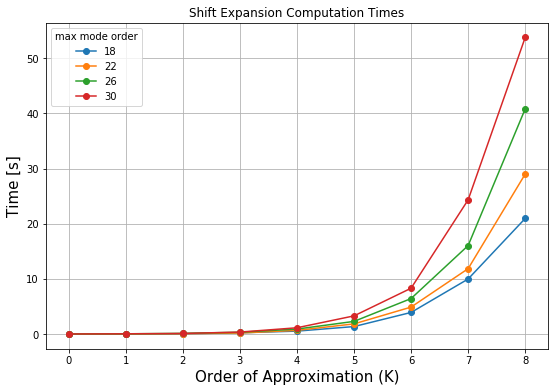

In [27]:
plt.figure(figsize=(9,6))
plt.plot(k_arr, total_time, marker='o',label='18')
plt.plot(k_arr, total_time1,marker='o',label='22')
plt.plot(k_arr, total_time2,marker='o',label='26')
plt.plot(k_arr, total_time3,marker='o',label='30')

plt.xlabel(r'Order of Approximation (K)', fontsize=15) 
plt.ylabel(r'Time [s]', fontsize=15) 
plt.title(r'Shift Expansion Computation Times')
plt.legend(title="max mode order")
plt.grid()
print('18',total_time)
print('22',total_time1)
print('26',total_time2)
print('30',total_time3)

C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


18 [0.0, 0.015625, 0.03125, 0.21875, 0.515625, 1.34375, 3.90625, 9.96875, 20.953125]
22 [0.0, 0.015625, 0.046875, 0.171875, 0.65625, 1.828125, 4.875, 11.84375, 29.0]
26 [0.0, 0.03125, 0.109375, 0.3125, 0.890625, 2.28125, 6.421875, 16.03125, 40.828125]
30 [0.0, 0.03125, 0.09375, 0.34375, 1.125, 3.28125, 8.296875, 24.328125, 53.78125]


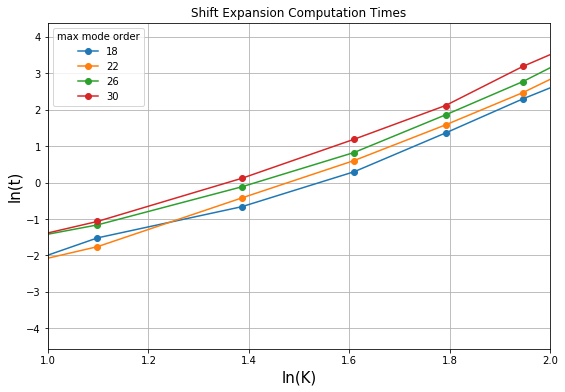

In [30]:
plt.figure(figsize=(9,6))
plt.plot(np.log(k_arr), np.log(total_time), marker='o',label='18')
plt.plot(np.log(k_arr), np.log(total_time1),marker='o',label='22')
plt.plot(np.log(k_arr), np.log(total_time2),marker='o',label='26')
plt.plot(np.log(k_arr), np.log(total_time3),marker='o',label='30')

plt.xlabel(r'ln(K)', fontsize=15) 
plt.ylabel(r'ln(t)', fontsize=15) 
plt.title(r'Shift Expansion Computation Times')
plt.legend(title="max mode order")
plt.xlim([1,2])
plt.grid()
print('18',total_time)
print('22',total_time1)
print('26',total_time2)
print('30',total_time3)

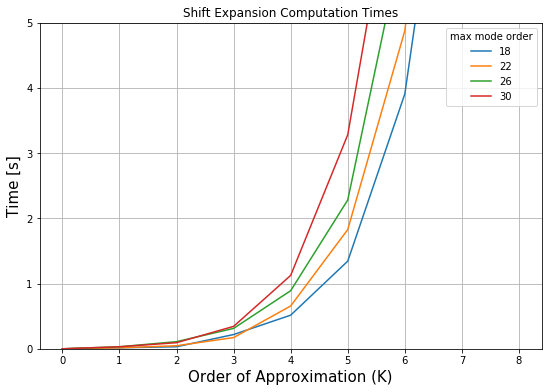

In [22]:
plt.figure(figsize=(9,6))
plt.plot(k_arr, total_time,label='18')
plt.plot(k_arr, total_time1,label='22')
plt.plot(k_arr, total_time2,label='26')
plt.plot(k_arr, total_time3,label='30')

plt.xlabel(r'Order of Approximation (K)', fontsize=15) 
plt.ylabel(r'Time [s]', fontsize=15) 
plt.title(r'Shift Expansion Computation Times')
plt.legend(title="max mode order")
plt.ylim([0,5])
plt.grid()

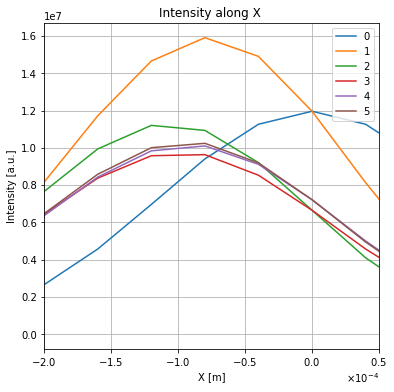

In [74]:
# pl.show_modes(modes)
# pl.show_modes(shifted_modes)
f = [0]*size
for i in range(size):
    f[i] = pl.calculate(params,plane,shifted_modes[i],z)
    
plplt.intslicex(0,f[0],f[1],f[2],f[3],f[4],f[5] ,xlim=([-200e-6,50e-6]),labels=['0','1','2','3','4','5'])

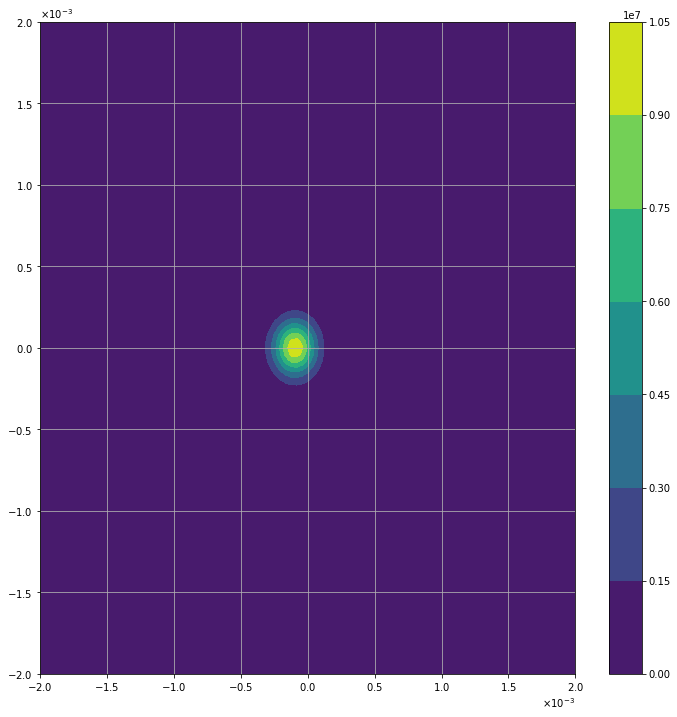

In [75]:
#get amps
calc = f[6]

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

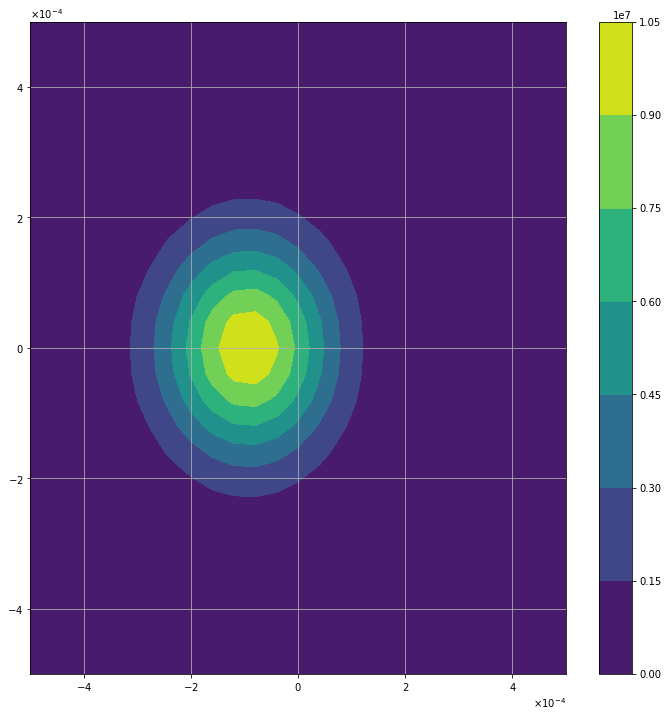

In [26]:
#get amps
calc = f[6]

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)
plt.xlim([-50e-5,50e-5])
plt.ylim([-50e-5,50e-5])
plt.grid()

In [ ]:
K=5
shifted_modes,shifted_ind = expand_shift(z,params,a,alpha,modes,K)

In [ ]:
# pl.show_modes(modes)
# pl.show_modes(shifted_modes)

In [ ]:
#get amps
calc = pl.calculate(params,plane,shifted_modes,z)

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

In [ ]:
#get amps
calc = pl.calculate(params,plane,shifted_modes,z)

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)
plt.xlim([-100e-6,100e-6])
plt.grid()

In [ ]:
K=10
shifted_modes,shifted_ind = expand_shift(z,params,a,alpha,modes,K)

In [ ]:
# pl.show_modes(modes)
# pl.show_modes(shifted_modes)

In [ ]:
#get amps
calc = pl.calculate(params,plane,shifted_modes,z)

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

In [ ]:
#get amps
calc = pl.calculate(params,plane,shifted_modes,z)

#plot
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(calc.plane.getX(), calc.plane.getY(), abs(calc.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)
plt.xlim([-150e-6,100e-6])
plt.grid()